# Visualizing Bird Songs with Python 

In [45]:
import matplotlib.pyplot as plt

from scipy import signal
from scipy.io import wavfile

import os
import glob

from pydub import AudioSegment
from pydub.playback import play

from tempfile import mktemp

In [40]:
song_directory = 'bird_songs/'
# files                                                                         
call_file_names = glob.glob(song_directory+"*Call*.mp3")
all_file_names = glob.glob(song_directory+"*.mp3")
for file_name in all_file_names:
    new_name = file_name.replace(' ', '_')
    os.rename(file_name, new_name)
    

In [41]:
call_file_names = glob.glob(song_directory+"*Call*.mp3")
print(call_file_names)

['bird_songs/05_Northern_Flicker_Call.mp3', 'bird_songs/15_White-breasted_Nuthatch_Call_2.mp3', "bird_songs/22_Cassin's_Finch_Call.mp3", 'bird_songs/18_White-crowned_Sparrow_Call.mp3', 'bird_songs/27_Evening_Grosbeak_Calls.mp3', "bird_songs/08_Steller's_Jay_Call.mp3", 'bird_songs/14_White-breasted_Nuthatch_Call_1.mp3', 'bird_songs/12_Black-capped_Chickadee_Call.mp3', 'bird_songs/10_Western_Scrub-Jay_Calls.mp3', 'bird_songs/03_Downy_Woodpecker_Calls.mp3', 'bird_songs/20_Red-winged_Blackbird_Calls.mp3', "bird_songs/09_Steller's_Jay_Calls.mp3", 'bird_songs/24_House_Finch_Call.mp3', 'bird_songs/25_Pine_Siskin_Song,_Calls.mp3', 'bird_songs/06_Northern_Flicker_Call_2.mp3', 'bird_songs/26_American_Goldfinch_Song,_Call.mp3']


In [50]:
song_file_names = glob.glob(song_directory+"*Song.mp3")
print(song_file_names)

['bird_songs/02_Mourning_Dove_Song.mp3', 'bird_songs/11_Black-capped_Chickadee_Song.mp3', 'bird_songs/19_Red-winged_Blackbird_Song.mp3', "bird_songs/21_Cassin's_Finch_Song.mp3", 'bird_songs/13_White-breasted_Nuthatch_Song.mp3', 'bird_songs/23_House_Finch_Song.mp3']


from https://stackoverflow.com/questions/15311853/plot-spectogram-from-mp3

In [82]:
def show_song(file_name):
    print(file_name[12:])
    
    mp3_audio = AudioSegment.from_file(file_name, format="mp3")  # read mp3
    wname = mktemp('.wav')  # use temporary file
    mp3_audio.export(wname, format="wav")
    
    #plot
    FS, data = wavfile.read(wname)  # read wav file
    if len(data.shape)> 1:
        data=data[:,0] #if 2 channels, use only left channel
        
    plt.specgram(data, Fs=FS, NFFT=128, noverlap=0)  # plot
    plt.axis('tight')
    plt.xlabel('Time [s]')
    plt.ylabel('Frequency [Hz]')
    plt.show()
    
    #play song
    sound = AudioSegment.from_file(wname, format="wav")
    play(sound)

2_Mourning_Dove_Song.mp3


/Users/fardila/anaconda/envs/birds/lib/python3.8/site-packages/matplotlib/axes/_axes.py:7581: RuntimeWarning: divide by zero encountered in log10
  Z = 10. * np.log10(spec)


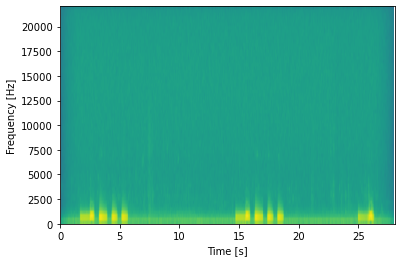

1_Black-capped_Chickadee_Song.mp3


/Users/fardila/anaconda/envs/birds/lib/python3.8/site-packages/matplotlib/axes/_axes.py:7581: RuntimeWarning: divide by zero encountered in log10
  Z = 10. * np.log10(spec)


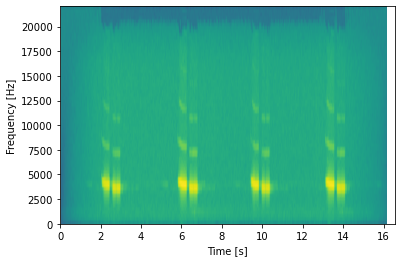

9_Red-winged_Blackbird_Song.mp3


/Users/fardila/anaconda/envs/birds/lib/python3.8/site-packages/matplotlib/axes/_axes.py:7581: RuntimeWarning: divide by zero encountered in log10
  Z = 10. * np.log10(spec)


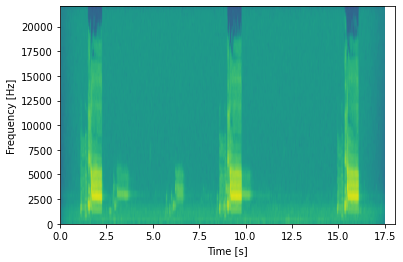

1_Cassin's_Finch_Song.mp3


/Users/fardila/anaconda/envs/birds/lib/python3.8/site-packages/matplotlib/axes/_axes.py:7581: RuntimeWarning: divide by zero encountered in log10
  Z = 10. * np.log10(spec)


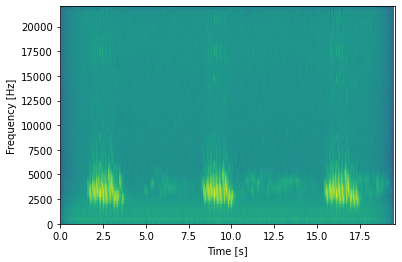

3_White-breasted_Nuthatch_Song.mp3


/Users/fardila/anaconda/envs/birds/lib/python3.8/site-packages/matplotlib/axes/_axes.py:7581: RuntimeWarning: divide by zero encountered in log10
  Z = 10. * np.log10(spec)


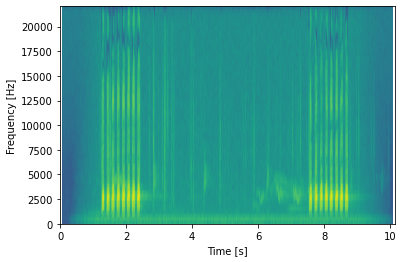

3_House_Finch_Song.mp3


/Users/fardila/anaconda/envs/birds/lib/python3.8/site-packages/matplotlib/axes/_axes.py:7581: RuntimeWarning: divide by zero encountered in log10
  Z = 10. * np.log10(spec)


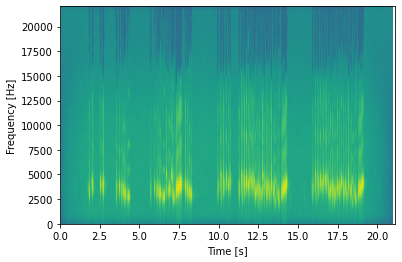

In [83]:
for file_name in song_file_names:
    show_song(file_name)

## TODO: make plots easier to see and read

##  TO DO: learn regular expression to get bird name

In [55]:
import re

In [60]:
re.sub('[1-9]', '', file_name[12:-3])

' Red-winged Blackbird Song.'